In [268]:
import pandas as pd
import matplotlib.pyplot as plt

%config InlineBackend.figure_format='retina'
plt.rc('font', family='Arial')

In [133]:
df_2021 = pd.read_csv('./microdados_ed_superior/2021/MICRODADOS_CADASTRO_CURSOS_2021.CSV', sep=';',encoding='latin', low_memory=False)
df_2020 = pd.read_csv('./microdados_ed_superior/2020/MICRODADOS_CADASTRO_CURSOS_2020.CSV', sep=';',encoding='latin', low_memory=False)
df_2019 = pd.read_csv('./microdados_ed_superior/2019/MICRODADOS_CADASTRO_CURSOS_2019.CSV', sep=';',encoding='latin', low_memory=False)
df_2018 = pd.read_csv('./microdados_ed_superior/2018/MICRODADOS_CADASTRO_CURSOS_2018.CSV', sep=';',encoding='latin', low_memory=False)
df_2017 = pd.read_csv('./microdados_ed_superior/2017/MICRODADOS_CADASTRO_CURSOS_2017.CSV', sep=';',encoding='latin', low_memory=False)

df = pd.concat([df_2021, df_2020, df_2019, df_2018, df_2017])


In [249]:
df.dropna(subset=['NO_REGIAO'], inplace=True)
df['TP_REDE'] = df['TP_REDE'].replace(to_replace={1: 'PÚBLICA', 2: 'PRIVADA'})

<Axes: xlabel='NU_ANO_CENSO'>

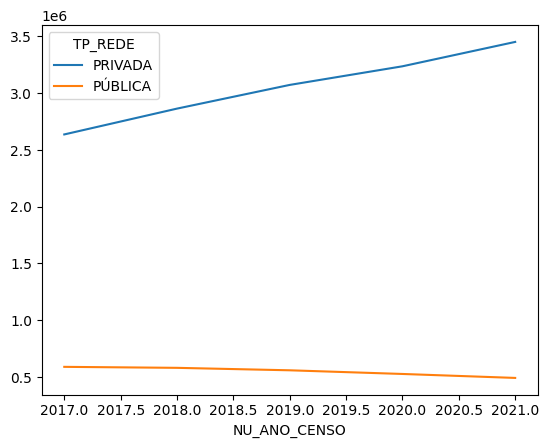

In [250]:
df.groupby(['NU_ANO_CENSO','TP_REDE'])['QT_ING'].sum().reset_index().pivot(index='NU_ANO_CENSO', columns='TP_REDE', values='QT_ING').plot.line()

<Axes: xlabel='NU_ANO_CENSO'>

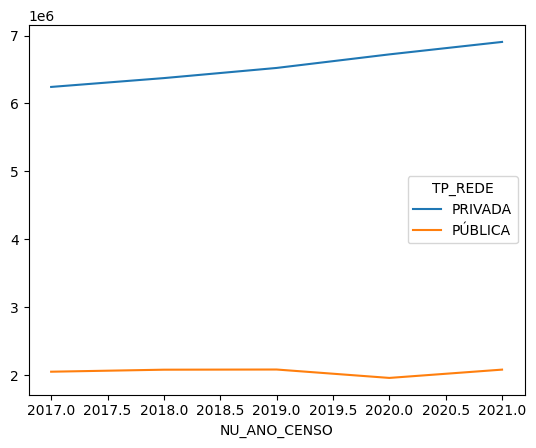

In [251]:
df.groupby(['NU_ANO_CENSO','TP_REDE'])['QT_MAT'].sum().reset_index().pivot(index='NU_ANO_CENSO', columns='TP_REDE', values='QT_MAT').plot.line()

<Axes: xlabel='NU_ANO_CENSO'>

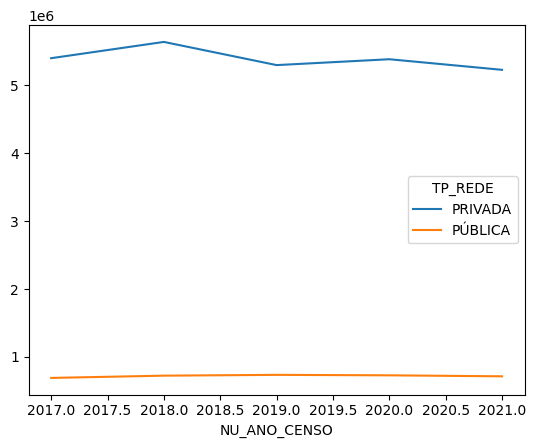

In [252]:
qtd_vagas_2017_2021 = df.groupby(['NU_ANO_CENSO','TP_REDE'])['QT_VG_TOTAL'].sum().reset_index().pivot(index='NU_ANO_CENSO', columns='TP_REDE', values='QT_VG_TOTAL')
qtd_vagas_2017_2021.plot.line()

In [278]:
df_ingressantes_etnia = df[
    ['NU_ANO_CENSO', 'TP_REDE', 'QT_ING_BRANCA', 'QT_ING_PRETA', 'QT_ING_PARDA', 'QT_ING_AMARELA', 'QT_ING_INDIGENA', 'QT_ING_CORND']
    ].groupby(['NU_ANO_CENSO', 'TP_REDE']).sum().apply(lambda x: x / x.sum() * 100, axis=1).unstack('TP_REDE')

etnias = ['QT_ING_BRANCA', 'QT_ING_PRETA', 'QT_ING_PARDA', 'QT_ING_AMARELA', 'QT_ING_INDIGENA', 'QT_ING_CORND']

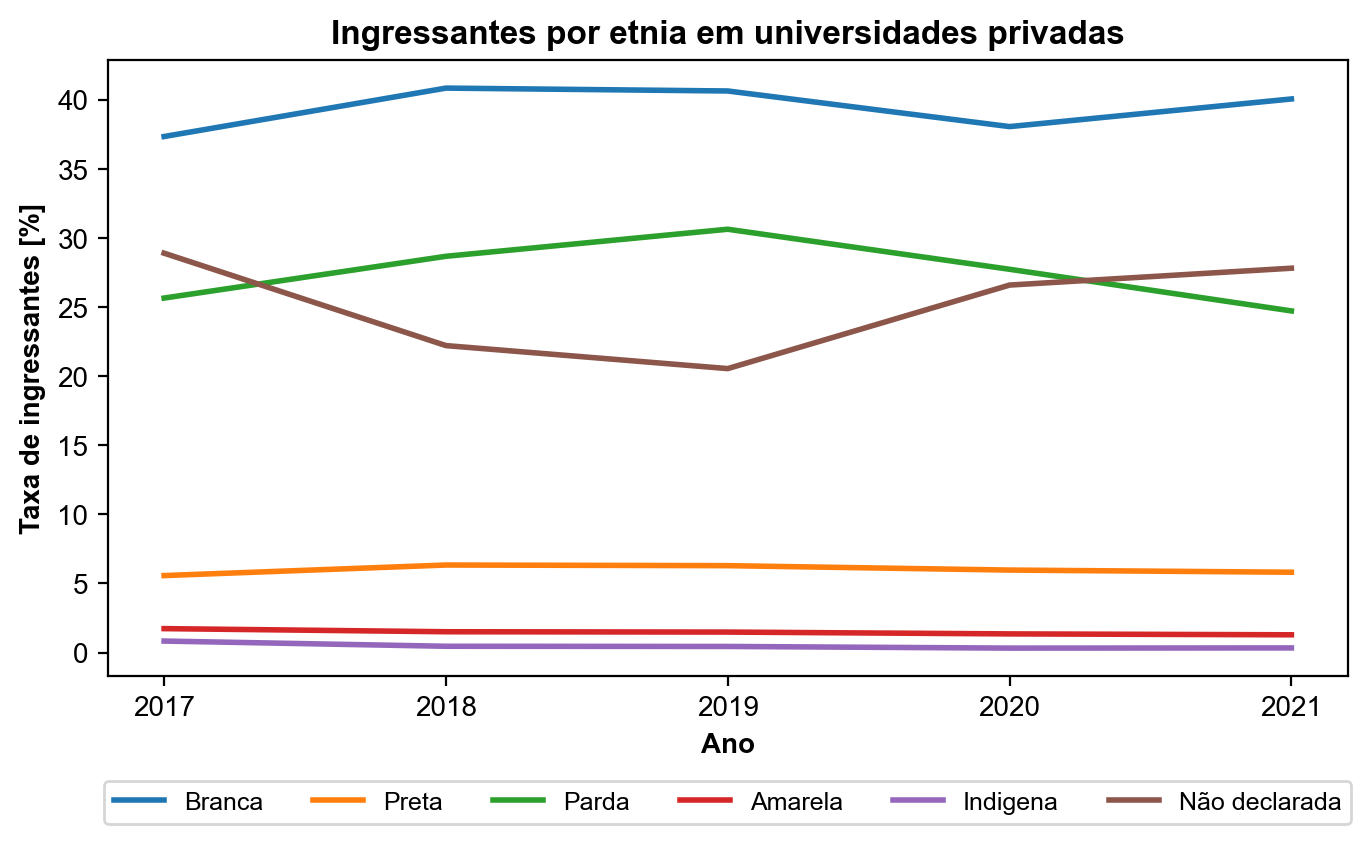

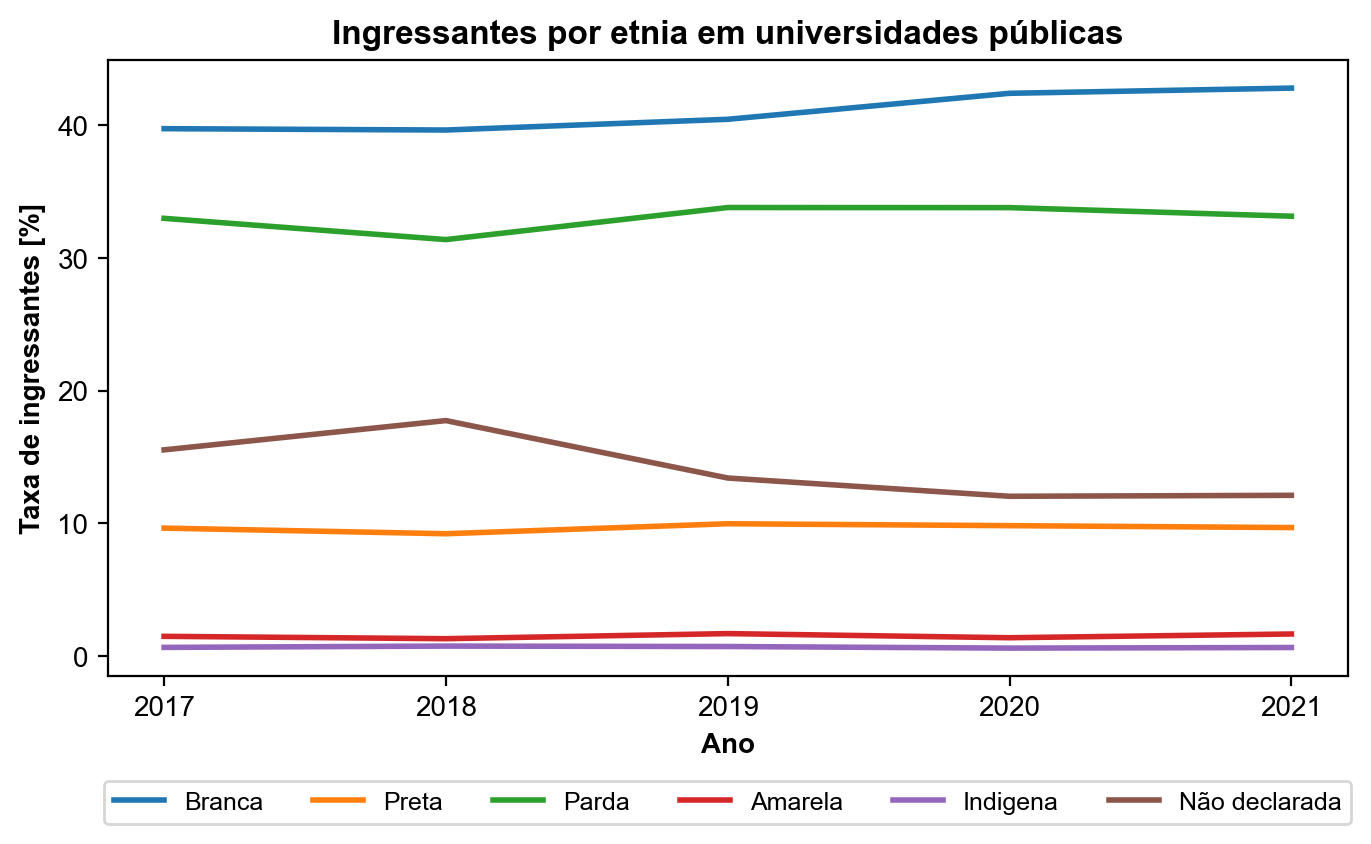

In [320]:
for tipo_universidade in ['PRIVADA','PÚBLICA']:
    fig, ax = plt.subplots(figsize=(8, 4))

    for tipo_etnia in etnias:
        dados = df_ingressantes_etnia[(tipo_etnia, tipo_universidade)]
        plt.plot(dados.index, dados.values, label=tipo_etnia.replace('QT_ING_','').replace('CORND','Não declarada').capitalize(), linewidth=2)
        
    plt.title('Ingressantes por etnia em universidades '+tipo_universidade.lower()+'s', fontweight='bold')
    ax.set_xticks([2017, 2018, 2019, 2020, 2021])
    plt.xlabel('Ano', fontweight='bold')
    plt.ylabel('Taxa de ingressantes [%]', fontweight='bold')
    plt.legend(fontsize=9, loc='upper center', bbox_to_anchor=(0.5, -0.15),
          fancybox=True, shadow=False, ncol=6)
    plt.show()

In [335]:
df_ingressantes_etnia['QT_ING_BRANCA', 'PÚBLICA']

NU_ANO_CENSO
2017    39.745151
2018    39.643339
2019    40.453118
2020    42.411382
2021    42.804325
Name: (QT_ING_BRANCA, PÚBLICA), dtype: float64

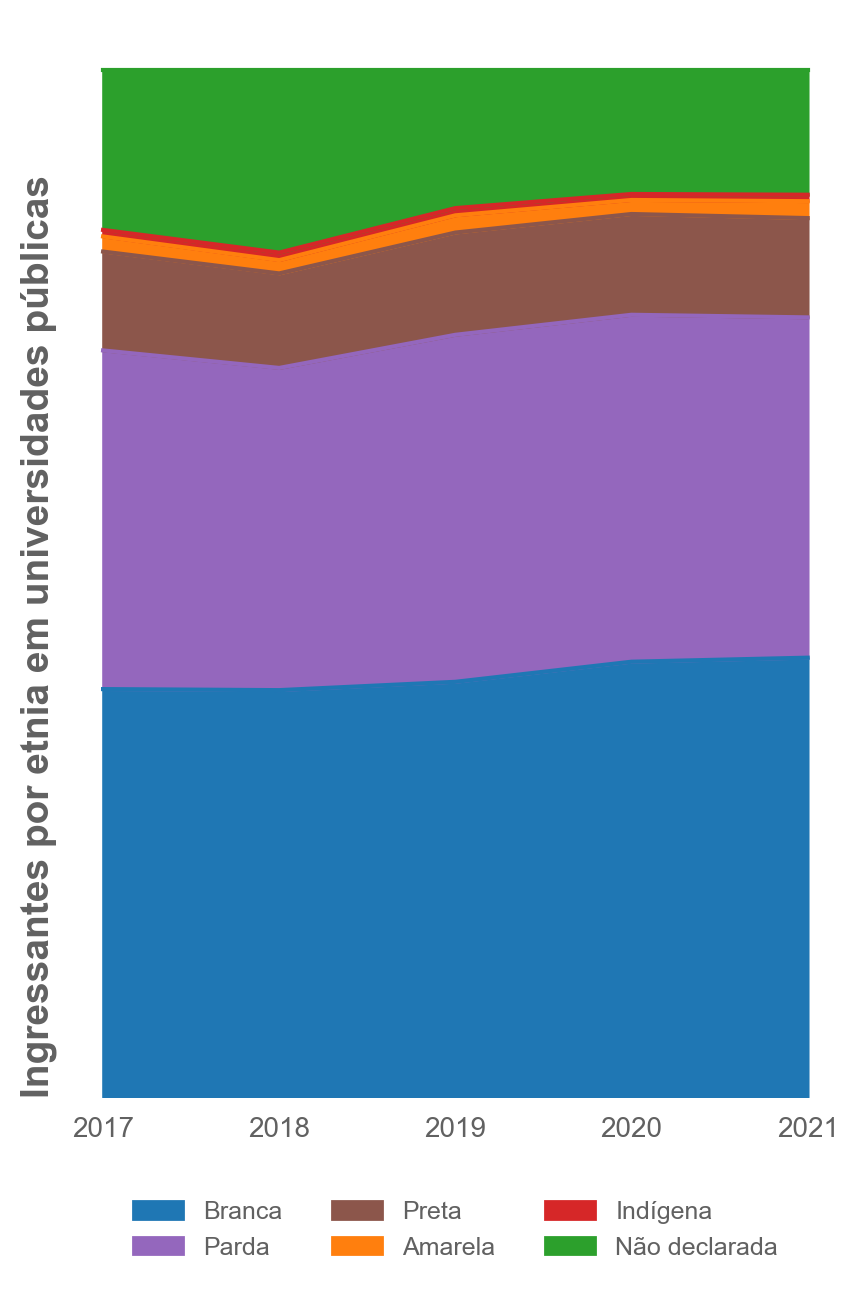

In [450]:
df_ingressantes_etnia_PUBLICA = df[
    ['NU_ANO_CENSO', 'TP_REDE', 'QT_ING_BRANCA', 'QT_ING_PRETA', 'QT_ING_PARDA', 'QT_ING_AMARELA', 'QT_ING_INDIGENA', 'QT_ING_CORND']
    ].groupby(['NU_ANO_CENSO', 'TP_REDE']).sum().apply(lambda x: x / x.sum() * 100, axis=1).reset_index().loc[lambda df: df['TP_REDE'] == 'PÚBLICA']

df_ingressantes_etnia_PUBLICA.columns = ['Ano', 'Tipo', 'Branca', 'Preta',
       'Parda', 'Amarela', 'Indígena', 'Não declarada']
df_ingressantes_etnia_PUBLICA = df_ingressantes_etnia_PUBLICA[['Ano', 'Tipo', 'Branca', 'Parda', 'Preta', 'Amarela', 'Indígena', 'Não declarada']]

ax = df_ingressantes_etnia_PUBLICA.set_index('Ano').plot(kind='area', figsize=(5,7), stacked=True, color=('#1F77B4', '#9467BD', '#8C564B', '#FF7F0E', '#D62728', '#2CA02C'))
ax.set_xticks([2017, 2018, 2019, 2020, 2021])

#plt.title('Ingressantes por etnia em universidades públicas', fontsize=12, color='#616161', loc='center', fontweight='bold')
plt.xlabel('')
ax.tick_params(axis='x', colors='#616161')
plt.ylabel('Ingressantes por etnia em universidades públicas', fontsize=14, color='#616161', loc='bottom', fontweight='bold')
plt.legend(fontsize=9, loc='upper center', bbox_to_anchor=(0.5, -0.075),fancybox=False, shadow=False, ncol=3, frameon=False, labelcolor='#616161')
plt.tick_params(left = False, bottom=False, labelleft = False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
plt.grid(False)
plt.savefig('Ingressantes_por_etnia_em_universidades_publicass.pdf', format="pdf", bbox_inches="tight")
plt.show()


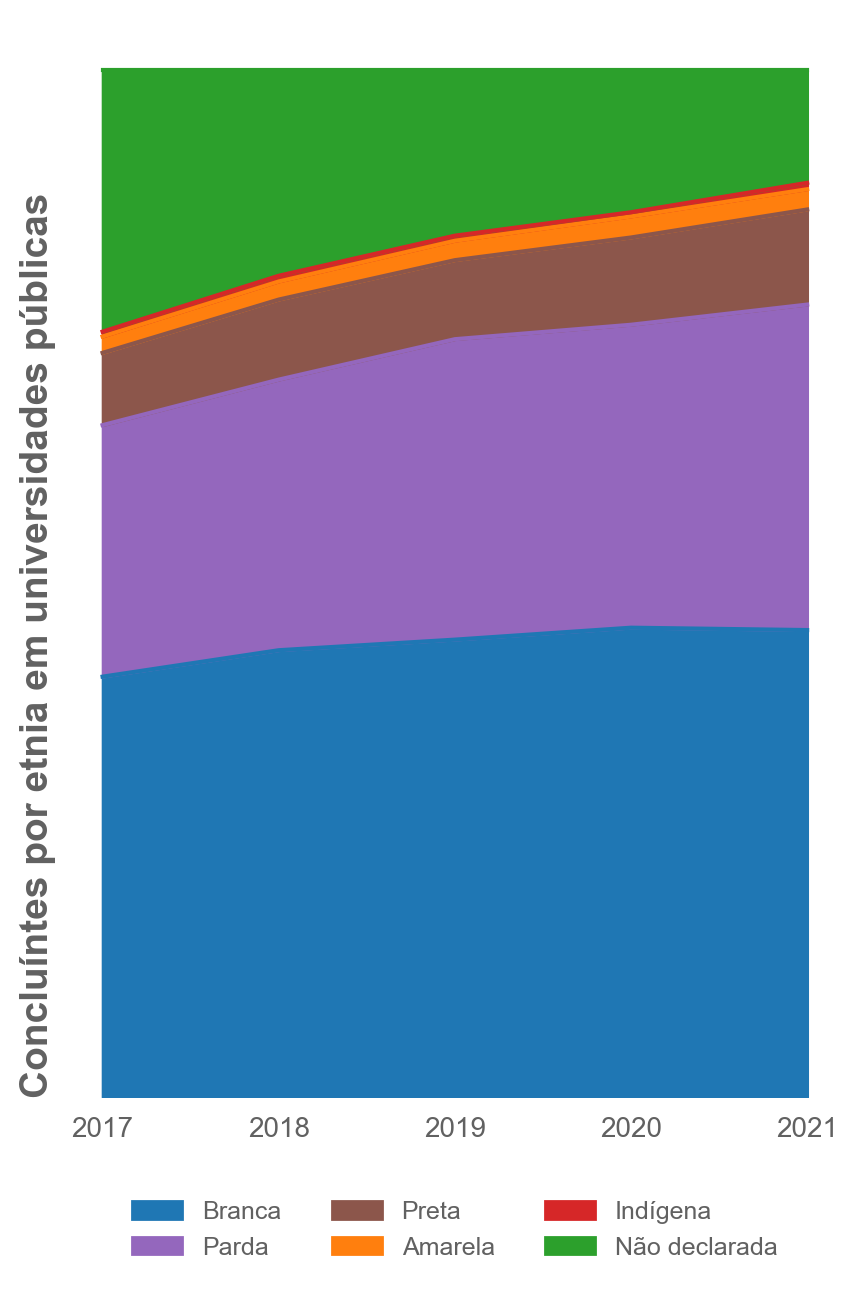

In [451]:
df_concluintes_etnia_PUBLICA = df[
    ['NU_ANO_CENSO', 'TP_REDE', 'QT_CONC_BRANCA', 'QT_CONC_PRETA', 'QT_CONC_PARDA', 'QT_CONC_AMARELA', 'QT_CONC_INDIGENA', 'QT_CONC_CORND']
    ].groupby(['NU_ANO_CENSO', 'TP_REDE']).sum().apply(lambda x: x / x.sum() * 100, axis=1).reset_index().loc[lambda df: df['TP_REDE'] == 'PÚBLICA']

df_concluintes_etnia_PUBLICA.columns = ['Ano', 'Tipo', 'Branca', 'Preta',
       'Parda', 'Amarela', 'Indígena', 'Não declarada']
df_concluintes_etnia_PUBLICA = df_concluintes_etnia_PUBLICA[['Ano', 'Tipo', 'Branca', 'Parda', 'Preta', 'Amarela', 'Indígena', 'Não declarada']]

ax = df_concluintes_etnia_PUBLICA.set_index('Ano').plot(kind='area', figsize=(5,7), stacked=True, color=('#1F77B4', '#9467BD', '#8C564B', '#FF7F0E', '#D62728', '#2CA02C'))
ax.set_xticks([2017, 2018, 2019, 2020, 2021])

#plt.title('Concluíntes por etnia em universidades públicas', fontsize=12, color='#616161', loc='center', fontweight='bold')
plt.xlabel('')
ax.tick_params(axis='x', colors='#616161')
plt.ylabel('Concluíntes por etnia em universidades públicas', fontsize=14, color='#616161', loc='bottom', fontweight='bold')
plt.legend(fontsize=9, loc='upper center', bbox_to_anchor=(0.5, -0.075),fancybox=False, shadow=False, ncol=3, frameon=False, labelcolor='#616161')
plt.tick_params(left = False, bottom=False, labelleft = False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
plt.grid(False)
plt.savefig('Concluintes_por_etnia_em_universidades_publicass.pdf', format="pdf", bbox_inches="tight")
plt.show()
